In [1]:
import gym
import numpy as np
from ddpg_agent import Agent
import time
import matplotlib.pyplot as plt

In [2]:
if __name__ =="__main__":
    env = gym.make("Pendulum-v0")
    agent = Agent(n_actions=env.action_space.shape[0], alpha=0.001, beta=0.002,
                  env=env, gamma=0.99, mem_size=50000, tau=0.005, fc1_dims=400, fc2_dims=300, 
                  batch_size=64, noise=0.1, chkpt_dir='models/ddpg/')
    n_games = 251

    best_score = env.reward_range[0]
    score_history = []
    load_checkpoint = False

    if load_checkpoint:
        agent.load_models()
        evaluate = True
    else:
        evaluate = False

    for i in range(n_games):
        observation = env.reset()
        done = False
        score = 0
        while not done:
            action = agent.choose_action(observation, evaluate)
            observation_, reward, done, info = env.step(action)
            score += reward
            agent.store_transition(observation, action, reward,
                                   observation_, done)
            if not load_checkpoint:
                agent.learn()
            observation = observation_

        score_history.append(score)
        avg_score = np.mean(score_history[-100:])

        if avg_score > best_score:
            best_score = avg_score
            if not load_checkpoint:
                agent.save_models()

        print('episode {} score {:.1f} avg score {:.1f}'.
              format(i, score, avg_score))


c:\Users\Lenovo\anaconda3\lib\site-packages\gym\logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


... saving models ...
INFO:tensorflow:Assets written to: models/ddpg/actor\assets
INFO:tensorflow:Assets written to: models/ddpg/target_actor\assets
INFO:tensorflow:Assets written to: models/ddpg/critic\assets
INFO:tensorflow:Assets written to: models/ddpg/target_critic\assets
episode 0 score -1797.5 avg score -1797.5
... saving models ...
INFO:tensorflow:Assets written to: models/ddpg/actor\assets
INFO:tensorflow:Assets written to: models/ddpg/target_actor\assets
INFO:tensorflow:Assets written to: models/ddpg/critic\assets
INFO:tensorflow:Assets written to: models/ddpg/target_critic\assets
episode 1 score -1769.7 avg score -1783.6
... saving models ...
INFO:tensorflow:Assets written to: models/ddpg/actor\assets
INFO:tensorflow:Assets written to: models/ddpg/target_actor\assets
INFO:tensorflow:Assets written to: models/ddpg/critic\assets
INFO:tensorflow:Assets written to: models/ddpg/target_critic\assets
episode 2 score -1566.2 avg score -1711.2
... saving models ...
INFO:tensorflow:As

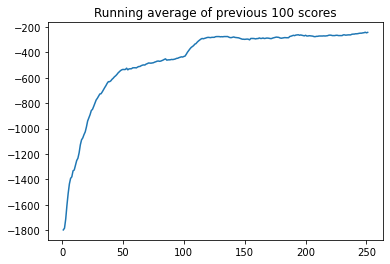

In [3]:
def plot_learning_curve(x, scores):
    running_avg = np.zeros(len(scores))
    for i in range(len(running_avg)):
        running_avg[i] = np.mean(scores[max(0, i-100):(i+1)])
    plt.plot(x, running_avg)
    plt.title('Running average of previous 100 scores')

x = [i+1 for i in range(n_games)]
plot_learning_curve(x, score_history)

In [5]:
obs = env.reset()
env.render(mode='human')
actions = []
score = 0
actions = []

agent.load_models() 
evaluate = False

while True:
    action = agent.choose_action(obs, evaluate)
    obs, reward, done, info = env.step(action)
    score += reward
    actions.append(action)
    time.sleep(0.01)

    if done:
        print(f"Done, points: {score}")
        break
 
env.close()
actions

... loading models ...
Done, points: -488.1404335601965


[<tf.Tensor: shape=(1,), dtype=float32, numpy=array([-0.9653643], dtype=float32)>,
 <tf.Tensor: shape=(1,), dtype=float32, numpy=array([-1.2224365], dtype=float32)>,
 <tf.Tensor: shape=(1,), dtype=float32, numpy=array([-0.8743409], dtype=float32)>,
 <tf.Tensor: shape=(1,), dtype=float32, numpy=array([-1.0559181], dtype=float32)>,
 <tf.Tensor: shape=(1,), dtype=float32, numpy=array([-1.1342359], dtype=float32)>,
 <tf.Tensor: shape=(1,), dtype=float32, numpy=array([-0.972418], dtype=float32)>,
 <tf.Tensor: shape=(1,), dtype=float32, numpy=array([-0.95484567], dtype=float32)>,
 <tf.Tensor: shape=(1,), dtype=float32, numpy=array([-1.0689247], dtype=float32)>,
 <tf.Tensor: shape=(1,), dtype=float32, numpy=array([-0.9732981], dtype=float32)>,
 <tf.Tensor: shape=(1,), dtype=float32, numpy=array([-0.88549167], dtype=float32)>,
 <tf.Tensor: shape=(1,), dtype=float32, numpy=array([-1.0208069], dtype=float32)>,
 <tf.Tensor: shape=(1,), dtype=float32, numpy=array([-1.019359], dtype=float32)>,
 <tf